# Project 3 - Vehicle Price Analysis

Hundreds of free vehicle ads are displayed on your website every day and it is necessary to explore the dataset over the past few years and determine the factors that influence the price of a vehicle.

## Introduction

A good car is influenced by many factors. Therefore, in this project an analysis will be carried out regarding what factors will influence the price of a car, so it can be sold properly.

### Aim of the Project

The objectives of this analysis include:
1. Look at what parameters influence the sales of a vehicle
2. Data selection that will be used to make conclusions
3. Analyze what factors most influence the price of a vehicle

### Steps of the Project

It is not explained what the quality of this data is, so an analysis process is needed first

This project consists of:
1. Data Preparation
2. Data pre-processing
3. Exploratory Data Analysis
4. General Conclusion

## Data Preparation

In [436]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [437]:
# Import dataset

df = pd.read_csv('vehicles_in_us.csv')

### Data Exploration

*dataset* contains the following columns:


- `price` — the price of a car
- `model_year` — year of manufacture of the car
- `model` — car type
- `condition` — car condition
- `cylinders` — the number of cylinders in the car engine
- `fuel` — gas, diesel, etc.
- `odometer` — vehicle mileage when the ad was shown
- `transmission`
- `paint_color` — car color
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — date the ad was posted
- `days_listed` — number of days the ad was shown until it was removed 

In [438]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [439]:
# General information for dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [440]:
# Sample data

df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Setelah dilihat secara singkat informasi pada dataframe, terdapat beberapa nilai yang hilang. Langkah selanjutnya akan dihitung berapa total nilai yang hilang, agar bisa diproses di langkah selanjutnya.

In [441]:
# Type of each column

df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

The 'date_posted' column shows the object data type where the actual data type should be date time. Therefore, it must be changed first

In [442]:
# Checking for missing values

df.isnull().sum().sort_values()

price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
model_year       3619
cylinders        5260
odometer         7892
paint_color      9267
is_4wd          25953
dtype: int64

In [443]:
df.isnull().sum().sort_values() / df.shape[0] *100

price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
model_year       7.023775
cylinders       10.208637
odometer        15.316836
paint_color     17.985444
is_4wd          50.369723
dtype: float64

There are 5 columns with missing values. The number of missing values is not symmetrical, as can be seen from the different numbers.

### Conclusion and Next Steps

The initial conclusion from the data frame above after checking are:
1. The initial data contains several missing values so they must be handled first
2. Data of a different type than what it should be will be replaced

The next step is to overcome missing values by creating a function and creating a new column to simplify the analysis process.

## Data Pre-Processing

### Handle Missing Values

In [444]:
# function for fill the missing value

def fill_nan_median(dataframe, agg_column, value_column) :
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

**model_year**

In [445]:
fill_nan_median(df, 'model', 'model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [446]:
df.isnull().sum().sort_values()

price               0
model_year          0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
cylinders        5260
odometer         7892
paint_color      9267
is_4wd          25953
dtype: int64

In [447]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


**cylinders**

In [448]:
fill_nan_median(df, 'model', 'cylinders')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [449]:
df.isnull().sum().sort_values()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
odometer         7892
paint_color      9267
is_4wd          25953
dtype: int64

**odometer**

In [450]:
fill_nan_median(df, 'model_year', 'odometer')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [451]:
df.isnull().sum().sort_values()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
odometer            1
paint_color      9267
is_4wd          25953
dtype: int64

In [452]:
#df = df.dropna(subset=['odometer'])

**paint_colour**

In [453]:
df['paint_color'] = df['paint_color'].fillna('unknown')

**is_4wd**

In [454]:
df['is_4wd'].unique()

array([ 1., nan])

In [455]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [456]:
df['is_4wd'].unique()

array([1., 0.])

In [457]:
df = df.dropna()

In [458]:
df.isnull().sum().sort_values()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

**Findings :**
- Missing data in the 'model_year' column, which shows the year a vehicle was made, have been filled in with the median of that column with reference to the 'model' column so that the data can be more precise.
- Missing data in the 'cylinders' column, which shows how many cylinders a vehicle's engine has, have been filled in with the median of that column with the same reference as the previous data.
- Missing data in the 'odometer' column, which shows how far the vehicle has traveled, have been filled in with the median of the column itself.
- Missing data in the 'paint_color' column can be caused by human error in the form of forgetting to include it, so it have been filled with the information "unknown"
- For missing data in the 'is_4wd' column, it have been replaced with the number 0, because it is possible that the customer who advertises his vehicle does not have a 4wd vehicle.

### Fix Type of Data

After handling the missing data, incorrect data types will be corrected

In [459]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [460]:
# changing the types of data

df['date_posted'] = pd.to_datetime(df['date_posted'])
df['model_year'] = df['model_year'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('bool')

In [461]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Explorative Data Analysis (EDA)

### Data Quality Correction

To make analysis easier, several columns will be added containing parameters such as the separation between the date, month and year when the ad was displayed

In [462]:
# Add the time and date values for when the ad was displayed

df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month
df['day_posted'] = df['date_posted'].dt.day

So that prospective buyers can find out how old the vehicle they want to buy is, a new column will be created, namely 'age_car', to show the age of the vehicle at the time of the advertisement.

In [463]:
# Add the age of the vehicle when the ad is shown

df['age_car'] = df['year_posted'] - df['model_year']
df.loc[df['age_car']==0, 'age_car'] = 1

Vehicle mileage is a parameter that is really considered by prospective buyers, therefore a new column 'new_odometer_yearly' will be created which is the average vehicle mileage per year

In [464]:
#  Add the average vehicle mileage per year

df['odometer_yearly'] = df['odometer'] / df['age_car']
df['odometer_yearly'] = np.floor(df['odometer_yearly'])
df['odometer_yearly'] = df['odometer_yearly'].astype('int')

In [465]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19,7,12672
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16,10087
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451


In [466]:
# To make it easier for potential buyers to know the condition of the vehicle, a description of each condition is made

def num_condition(cell):
    if cell == 'new':
        return 5
    elif cell == 'like new':
        return 4
    elif cell == 'excellent':
        return 3
    elif cell == 'good':
        return 2
    elif cell == 'fair':
        return 1
    else:
        return 0

In [467]:
df['numeric_condition'] = df['condition'].apply(num_condition)

In [468]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19,7,12672,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333,4
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16,10087,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451,3


### Checking Clean Data

Data inspection is very useful for further analysis, so it is necessary to carry out checks such as checking for missing data, data types, and adding parameters.

In [469]:
# General information/summary of new dataset

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51524 non-null  int64         
 1   model_year         51524 non-null  int64         
 2   model              51524 non-null  object        
 3   condition          51524 non-null  object        
 4   cylinders          51524 non-null  int64         
 5   fuel               51524 non-null  object        
 6   odometer           51524 non-null  int64         
 7   transmission       51524 non-null  object        
 8   type               51524 non-null  object        
 9   paint_color        51524 non-null  object        
 10  is_4wd             51524 non-null  bool          
 11  date_posted        51524 non-null  datetime64[ns]
 12  days_listed        51524 non-null  int64         
 13  year_posted        51524 non-null  int64         
 14  month_

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
count,51524.00000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
mean,12132.35104,2009.795125,6.121031,115199.695598,39.554382,2018.307468,6.628406,15.449441,8.554111,17725.130075,2.637548
std,10040.86718,6.089046,1.657452,62083.207576,28.204413,0.461450,3.474115,8.736598,6.047512,12442.755244,0.712449
min,1.00000,1908.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.00000,2007.000000,4.000000,73500.000000,19.000000,2018.000000,3.000000,8.000000,4.000000,10909.000000,2.000000
50%,9000.00000,2011.000000,6.000000,114074.000000,33.000000,2018.000000,7.000000,15.000000,8.000000,15234.000000,3.000000
75%,16836.00000,2014.000000,8.000000,152862.000000,53.000000,2019.000000,10.000000,23.000000,12.000000,20982.500000,3.000000
max,375000.00000,2019.000000,12.000000,990000.000000,271.000000,2019.000000,12.000000,31.000000,110.000000,373200.000000,5.000000


In [470]:
# sample new dataset

df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
18213,28500,2015,chevrolet silverado,excellent,8,gas,55500,automatic,truck,black,True,2018-09-05,34,2018,9,5,3,18500,3
37761,17995,2012,ram 1500,excellent,8,gas,110000,automatic,pickup,unknown,True,2019-02-25,28,2019,2,25,7,15714,3
6940,54959,2018,chevrolet silverado 2500hd,like new,8,diesel,24500,automatic,truck,white,True,2019-02-01,39,2019,2,1,1,24500,4
42503,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,99840,automatic,van,unknown,False,2018-05-28,14,2018,5,28,5,19968,3
46735,17900,2015,toyota rav4,excellent,4,gas,51821,automatic,SUV,grey,True,2019-02-10,78,2019,2,10,4,12955,3
4041,17900,2013,chevrolet silverado 1500,good,8,gas,102150,automatic,truck,red,True,2019-01-06,36,2019,1,6,6,17025,2
46168,4995,2005,chrysler town & country,good,6,gas,59000,automatic,mini-van,blue,False,2018-12-29,42,2018,12,29,13,4538,2
11112,4300,2009,ford focus se,good,4,gas,131565,automatic,sedan,red,False,2018-06-22,14,2018,6,22,9,14618,2
17565,1500,2012,ford econoline,good,8,gas,210996,automatic,van,white,False,2019-04-08,12,2019,4,8,7,30142,2
37427,33997,2017,gmc sierra 1500,excellent,8,gas,29681,automatic,truck,white,True,2019-02-02,64,2019,2,2,2,14840,3


### Core Parameters

The parameters that will be used for analysis include:

- Price
- Vehicle age when the ad is displayed
- Mileage
- Number of cylinders
- Condition

**price**

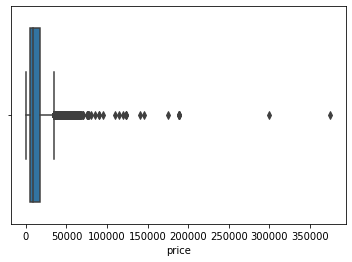

In [471]:
# boxplot and histogram of 'price' column

sns.boxplot(df['price']);

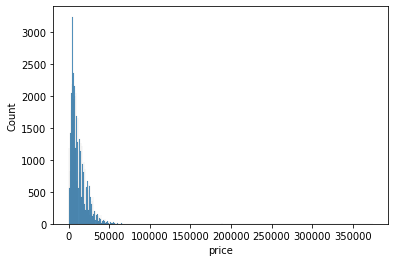

In [472]:
sns.histplot(df['price']);

**age_car**

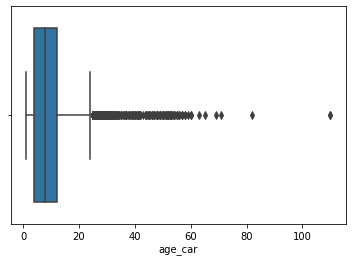

In [473]:
# boxplot and histogram of 'age car' column

sns.boxplot(df['age_car']);

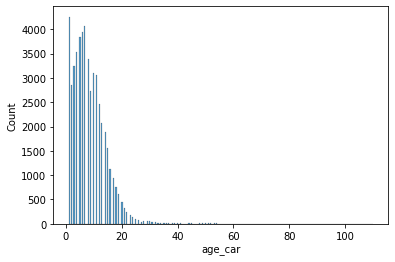

In [474]:
sns.histplot(df['age_car']);

**odometer**

<AxesSubplot:xlabel='odometer'>

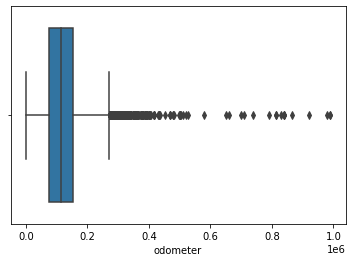

In [475]:
# boxplot and histogram of 'odometer' column

sns.boxplot(df['odometer'])

<AxesSubplot:xlabel='odometer', ylabel='Count'>

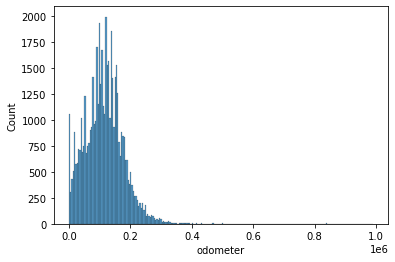

In [476]:
sns.histplot(df['odometer'])

**cylinder**

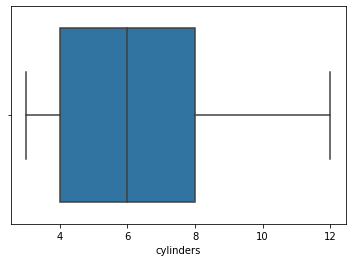

In [477]:
# boxplot and histogram of 'cylinder' column

sns.boxplot(df['cylinders']);

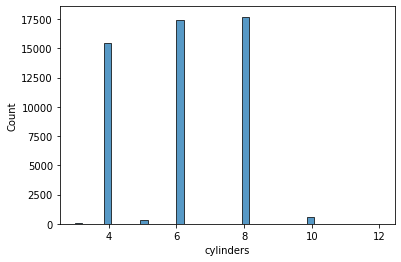

In [478]:
sns.histplot(df['cylinders']);

**condition**

<AxesSubplot:xlabel='numeric_condition', ylabel='count'>

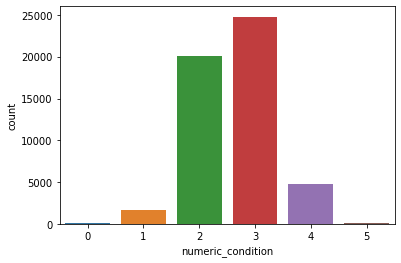

In [479]:
# boxplot and histogram of 'condition' column

sns.countplot(df['numeric_condition'])

<AxesSubplot:xlabel='numeric_condition'>

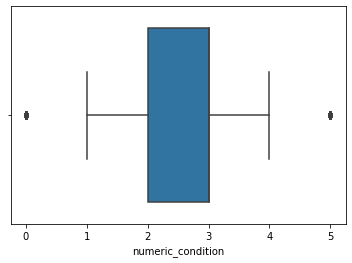

In [480]:
sns.boxplot(df['numeric_condition'])

**FIndings :**

- In the 'price' column, there are many outliers that might make it unreasonable, therefore this column will be processed further
- In the 'age_car' column you can see a very high number. This figure will likely put off potential buyers because of how old a vehicle is. However, the length of the vehicle's age will not be a very big problem considering that many people are interested in old cars
- In the 'new_odometer' column, you can see a number of numbers indicating the high frequency with which a vehicle is used by a customer. This figure can be a parameter that has a big impact on a potential buyer's decision, considering that the frequent use of a vehicle will reduce the performance of an engine.
- There are no problems with the 'new_cylinders' column in this data frame
- The 'numeric_condition' column shows that the average sales of a vehicle are in good and very good condition

### Observe and Handle Outlier

In [481]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,19,7,12672,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333,4
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16,10087,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451,3


**price**

Due to the large number of outliers in the 'price' column, the data will be reduced, which aims to make it easier for potential buyers to find the right price

In [482]:
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
IQR_price = q3_price - q1_price
lower_whisker_price = q1_price - (1.5 * IQR_price)
upper_whisker_price = q3_price + (1.5 * IQR_price)

In [483]:
# Determine the upper and lower limits for outliers

print('Lower Whisker:', lower_whisker_price)
print('Upper Whisker:', upper_whisker_price)

Lower Whisker: -12754.0
Upper Whisker: 34590.0


In [484]:
# Store data without outliers in a separate DataFrame
# df = latest dataframe after the 'price' column has been handled for outliers

df2 = df[(df['price']>lower_whisker_price) &
         (df['price']<upper_whisker_price)].reset_index(drop=True)


In [485]:
df2.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,11093.535329,2009.621045,6.080844,117423.182981,39.550768,2018.307415,6.627902,15.453463,8.718110,17563.783334,2.620604
std,7804.013566,5.966780,1.659299,61186.157407,28.207226,0.461427,3.474397,8.736927,5.937098,12149.308305,0.705838
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4995.000000,2006.000000,4.000000,77664.000000,19.000000,2018.000000,3.000000,8.000000,4.000000,10909.000000,2.000000
50%,8990.000000,2011.000000,6.000000,117200.000000,33.000000,2018.000000,7.000000,15.000000,8.000000,15142.000000,3.000000
75%,15900.000000,2014.000000,8.000000,153108.000000,53.000000,2019.000000,10.000000,23.000000,12.000000,20750.000000,3.000000
max,34555.000000,2019.000000,12.000000,990000.000000,271.000000,2019.000000,12.000000,31.000000,110.000000,373200.000000,5.000000


In [486]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
count,51524.00000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
mean,12132.35104,2009.795125,6.121031,115199.695598,39.554382,2018.307468,6.628406,15.449441,8.554111,17725.130075,2.637548
std,10040.86718,6.089046,1.657452,62083.207576,28.204413,0.461450,3.474115,8.736598,6.047512,12442.755244,0.712449
min,1.00000,1908.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.00000,2007.000000,4.000000,73500.000000,19.000000,2018.000000,3.000000,8.000000,4.000000,10909.000000,2.000000
50%,9000.00000,2011.000000,6.000000,114074.000000,33.000000,2018.000000,7.000000,15.000000,8.000000,15234.000000,3.000000
75%,16836.00000,2014.000000,8.000000,152862.000000,53.000000,2019.000000,10.000000,23.000000,12.000000,20982.500000,3.000000
max,375000.00000,2019.000000,12.000000,990000.000000,271.000000,2019.000000,12.000000,31.000000,110.000000,373200.000000,5.000000


After subtracting the outliers, you can see the difference between the new dataframe (df2) and the old dataframe (df1)

<AxesSubplot:xlabel='price'>

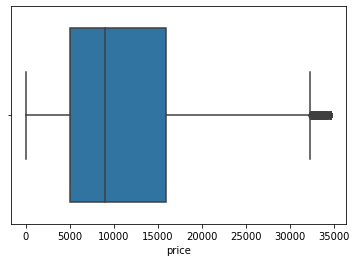

In [487]:
#boxplot check for outlier
sns.boxplot(df2['price'])

Checking with a boxplot also shows that the outliers have been reduced. This will be repeated several times so that the data looks clean.

***Repetition 1***

In [488]:
q1_price = df2['price'].quantile(0.25)
q3_price = df2['price'].quantile(0.75)
IQR_price = q3_price - q1_price
lower_whisker_price = q1_price - (1.5 * IQR_price)
upper_whisker_price = q3_price + (1.5 * IQR_price)
print('Lower Whisker:', lower_whisker_price)
print('Upper Whisker:', upper_whisker_price)

Lower Whisker: -11362.5
Upper Whisker: 32257.5


In [489]:
df2 = df2[(df2['price']>lower_whisker_price) &
         (df2['price']<upper_whisker_price)].reset_index(drop=True)

<AxesSubplot:xlabel='price'>

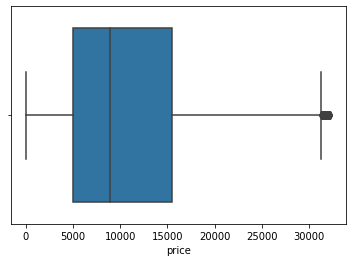

In [490]:
sns.boxplot(df2['price'])

***Repetition 2***

In [491]:
q1_price = df2['price'].quantile(0.25)
q3_price = df2['price'].quantile(0.75)
IQR_price = q3_price - q1_price
lower_whisker_price = q1_price - (1.5 * IQR_price)
upper_whisker_price = q3_price + (1.5 * IQR_price)
print('Lower Whisker:', lower_whisker_price)
print('Upper Whisker:', upper_whisker_price)

Lower Whisker: -10762.5
Upper Whisker: 31257.5


In [492]:
df2 = df2[(df2['price']>lower_whisker_price) &
         (df2['price']<upper_whisker_price)].reset_index(drop=True)

***Repetition 3***

In [493]:
q1_price = df2['price'].quantile(0.25)
q3_price = df2['price'].quantile(0.75)
IQR_price = q3_price - q1_price
lower_whisker_price = q1_price - (1.5 * IQR_price)
upper_whisker_price = q3_price + (1.5 * IQR_price)
print('Lower Whisker:', lower_whisker_price)
print('Upper Whisker:', upper_whisker_price)

Lower Whisker: -10012.5
Upper Whisker: 30007.5


In [494]:
df2 = df2[(df2['price']>lower_whisker_price) &
         (df2['price']<upper_whisker_price)].reset_index(drop=True)

***Repetition 4***

In [495]:
q1_price = df2['price'].quantile(0.25)
q3_price = df2['price'].quantile(0.75)
IQR_price = q3_price - q1_price
lower_whisker_price = q1_price - (1.5 * IQR_price)
upper_whisker_price = q3_price + (1.5 * IQR_price)
print('Lower Whisker:', lower_whisker_price)
print('Upper Whisker:', upper_whisker_price)

Lower Whisker: -10011.0
Upper Whisker: 30005.0


In [496]:
df2 = df2[(df2['price']>lower_whisker_price) &
         (df2['price']<upper_whisker_price)].reset_index(drop=True)

The 3rd and 4th repetitions have the same upper and lower limits, so no more repetitions will be carried out

<AxesSubplot:xlabel='price'>

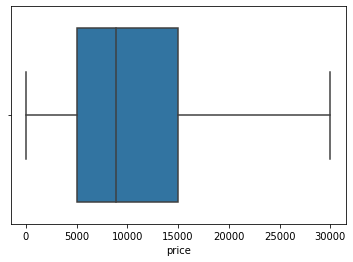

In [497]:
sns.boxplot(df2['price'])

**new_odometer**

Due to the large number of outliers in the 'new_odometer' column, the data will be reduced, which aims to make it easier for potential buyers to find vehicles that are not used too often, thus making sure that a vehicle's engine is still in good condition.

In [498]:
q1_odo = df2['odometer'].quantile(0.25)
q3_odo = df2['odometer'].quantile(0.75)
IQR_price = q3_odo - q1_odo
lower_whisker_odo = q1_odo - (1.5 * IQR_price)
upper_whisker_odo = q3_odo + (1.5 * IQR_price)

In [499]:
print('Lower Whisker:', lower_whisker_odo)
print('Upper Whisker:', upper_whisker_odo)

Lower Whisker: -35287.5
Upper Whisker: 267572.5


In [500]:
# df3 = dataframe terbaru setelah kolom 'new_odometer_yearly' ditangani outliernya
df3 = df2[(df2['odometer']>lower_whisker_odo) &
          (df2['odometer']<upper_whisker_odo)].reset_index(drop=True)

In [501]:
df3.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
count,48195.000000,48195.000000,48195.000000,48195.000000,48195.000000,48195.000000,48195.000000,48195.000000,48195.000000,48195.000000,48195.000000
mean,10747.036145,2009.601473,6.046540,115681.459674,39.540035,2018.306712,6.631725,15.454072,8.734246,17318.774147,2.624608
std,7297.967313,5.896981,1.659308,55250.607556,28.194567,0.461134,3.472544,8.739175,5.870725,11495.042141,0.701057
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4995.000000,2007.000000,4.000000,78285.000000,19.000000,2018.000000,3.000000,8.000000,5.000000,10823.000000,2.000000
50%,8900.000000,2011.000000,6.000000,117347.000000,33.000000,2018.000000,7.000000,15.000000,8.000000,15000.000000,3.000000
75%,15000.000000,2014.000000,8.000000,153000.000000,53.000000,2019.000000,10.000000,23.000000,12.000000,20652.500000,3.000000
max,30000.000000,2019.000000,12.000000,267500.000000,271.000000,2019.000000,12.000000,31.000000,110.000000,195700.000000,5.000000


In [502]:
df2.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
count,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000
mean,10678.918026,2009.511550,6.056605,118663.854961,39.535815,2018.307004,6.629993,15.454005,8.824073,17467.171491,2.615970
std,7286.706195,5.933466,1.659905,60865.914872,28.180442,0.461256,3.473039,8.735328,5.908052,12021.263948,0.704951
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4995.000000,2006.000000,4.000000,78285.000000,19.000000,2018.000000,3.000000,8.000000,5.000000,10899.000000,2.000000
50%,8875.000000,2011.000000,6.000000,118779.500000,33.000000,2018.000000,7.000000,15.000000,8.000000,15072.000000,3.000000
75%,14999.000000,2014.000000,8.000000,154000.000000,53.000000,2019.000000,10.000000,23.000000,12.000000,20674.000000,3.000000
max,30000.000000,2019.000000,12.000000,990000.000000,271.000000,2019.000000,12.000000,31.000000,110.000000,373200.000000,5.000000


After reducing the outliers, you can see the difference between the latest dataframe (df3) and the new dataframe (df2)

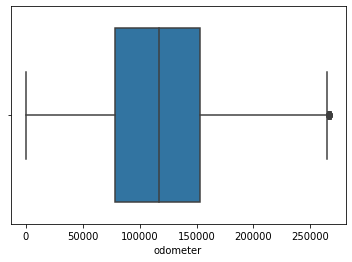

In [503]:
sns.boxplot(df3['odometer']);

Checking the boxplot also shows that the outliers have reduced significantly, this is good for making it easier for potential buyers to make decisions. However, several more repetitions will be carried out so that the data looks clean

***Repetition 1***

In [504]:
q1_odo = df3['odometer'].quantile(0.25)
q3_odo = df3['odometer'].quantile(0.75)
IQR_price = q3_odo - q1_odo
lower_whisker_odo = q1_odo - (1.5 * IQR_price)
upper_whisker_odo = q3_odo + (1.5 * IQR_price)
print('Lower Whisker:', lower_whisker_odo)
print('Upper Whisker:', upper_whisker_odo)

Lower Whisker: -33787.5
Upper Whisker: 265072.5


In [505]:
df3 = df3[(df3['odometer']>lower_whisker_odo) &
          (df3['odometer']<upper_whisker_odo)].reset_index(drop=True)

***Repetition 2***

In [506]:
q1_odo = df3['odometer'].quantile(0.25)
q3_odo = df3['odometer'].quantile(0.75)
IQR_price = q3_odo - q1_odo
lower_whisker_odo = q1_odo - (1.5 * IQR_price)
upper_whisker_odo = q3_odo + (1.5 * IQR_price)
print('Lower Whisker:', lower_whisker_odo)
print('Upper Whisker:', upper_whisker_odo)

Lower Whisker: -33787.5
Upper Whisker: 265072.5


In [507]:
df3 = df3[(df3['odometer']>lower_whisker_odo) &
          (df3['odometer']<upper_whisker_odo)].reset_index(drop=True)

***Repetition 3***

In [508]:
q1_odo = df3['odometer'].quantile(0.25)
q3_odo = df3['odometer'].quantile(0.75)
IQR_price = q3_odo - q1_odo
lower_whisker_odo = q1_odo - (1.5 * IQR_price)
upper_whisker_odo = q3_odo + (1.5 * IQR_price)
print('Lower Whisker:', lower_whisker_odo)
print('Upper Whisker:', upper_whisker_odo)

Lower Whisker: -33787.5
Upper Whisker: 265072.5


In [509]:
df3 = df3[(df3['odometer']>lower_whisker_odo) &
          (df3['odometer']<upper_whisker_odo)].reset_index(drop=True)

***Repetition 4***

In [510]:
q1_odo = df3['odometer'].quantile(0.25)
q3_odo = df3['odometer'].quantile(0.75)
IQR_price = q3_odo - q1_odo
lower_whisker_odo = q1_odo - (1.5 * IQR_price)
upper_whisker_odo = q3_odo + (1.5 * IQR_price)
print('Lower Whisker:', lower_whisker_odo)
print('Upper Whisker:', upper_whisker_odo)

Lower Whisker: -33787.5
Upper Whisker: 265072.5


The 3rd and 4th repetitions have the same upper and lower limits, so no more repetitions will be carried out

In [ ]:
sns.boxplot(df2['odometer'])

### Core Parameters without Outlier

This time we will compare the latest dataframe (df3) with the old dataframe (df1) using a boxplot

**price**

<AxesSubplot:xlabel='price'>

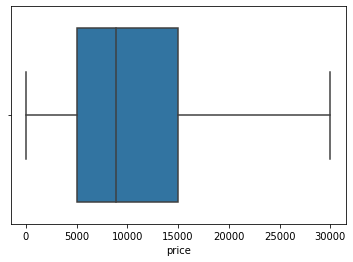

In [511]:
sns.boxplot(df2['price'])

<AxesSubplot:xlabel='price'>

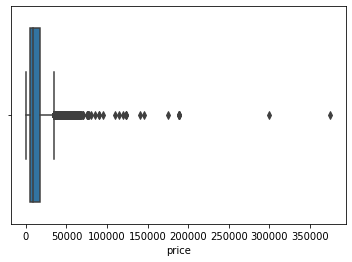

In [512]:
sns.boxplot(df['price'])

**new_odometer**

<AxesSubplot:xlabel='odometer'>

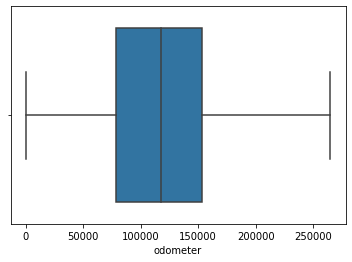

In [513]:
sns.boxplot(df3['odometer'])

<AxesSubplot:xlabel='odometer'>

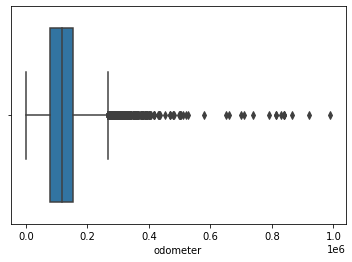

In [514]:
sns.boxplot(df2['odometer'])

**Findings :**

- For the new 'price' column, very different from before, the newest dataframe (df3) has fewer outliers than the old dataframe (df1)
- For the 'new_odometer' column, you can see a very significant difference from the previous one, the latest dataframe (df3) has very few outliers compared to the old dataframe (df1)

### Advertisement Validity Period

A good advertisement does not need to take a long time to make customers interested. Therefore, it is necessary to analyze the length of time an advertisement lasts

In [515]:
df3['days_listed'].describe()

count    48151.000000
mean        39.542377
std         28.195756
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:xlabel='days_listed'>

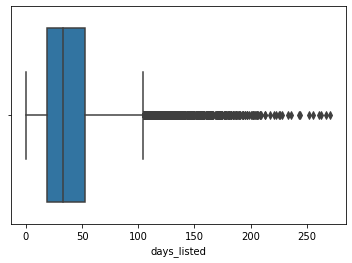

In [516]:
sns.boxplot(df3['days_listed'])

<AxesSubplot:xlabel='days_listed', ylabel='Count'>

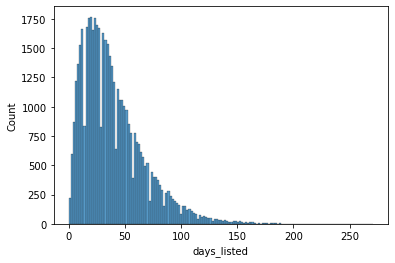

In [517]:
sns.histplot(df3['days_listed'])

**Findings :**

- If you look at the explanation above, the average number of advertisements for the sale of a vehicle is around 33 days, which is the average and 39 days, which is the median. Although it does not rule out the possibility that attractive advertisements will take longer than that

### Average Price of Each Type of Vehicle

This analysis will look at the average price of a vehicle in the advertisement. This analysis aims to see what types of vehicles have the potential for a potential buyer to be interested in making a purchase.

In [518]:
# combine spesific column to make analysis easier

group1 = df3.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'model' : 'count_type'
}).sort_values(by='count_type')

In [519]:
group1

,avg_price,count_type
type,,
bus,17135.666667,24
offroad,12940.487437,199
other,9918.539419,241
convertible,12121.720482,415
van,8502.805893,577
hatchback,6883.415698,1032
mini-van,8007.847769,1143
wagon,8919.954031,1501
coupe,13208.221562,2189


In [520]:
group1.sum().sort_values()

count_type     48151.000000
avg_price     142988.338701
dtype: float64

Text(0, 0.5, 'Avg price per Type')

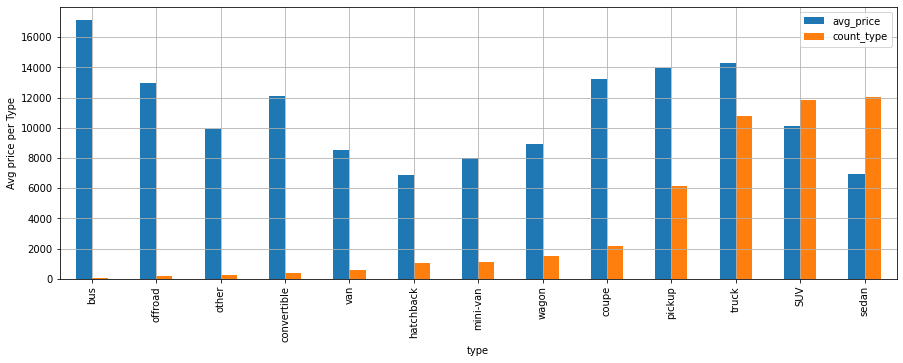

In [521]:
group1.plot(kind='bar', grid=True, figsize=(20, 5))
plt.ylabel('Avg price per Type')

**Findings :**

- The sedan type of vehicle has the lowest price and is the most widely advertised, followed by the SUV and truck types. Therefore, further analysis will be carried out in the form of an examination of what factors actually influence the price of a vehicle.

### Price Factor

Many factors will influence the price of a vehicle, so an analysis will be carried out regarding the correlation of several factors with the price of a vehicle, which is useful to make it easier for customers to sell a vehicle. The types of vehicles used include sedans, SUVs and trucks, because these are the two types that are most often advertised

**sedan**

In [522]:
df3_sedan = df3[df3['type']=='sedan'].reset_index(drop=True)

In [523]:
df3_sedan.corr()['price']

price                1.000000
model_year           0.567929
cylinders           -0.045361
odometer            -0.564233
is_4wd               0.036773
days_listed          0.000142
year_posted          0.015588
month_posted        -0.018131
day_posted           0.004558
age_car             -0.561803
odometer_yearly      0.268158
numeric_condition    0.294170
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='odometer'>

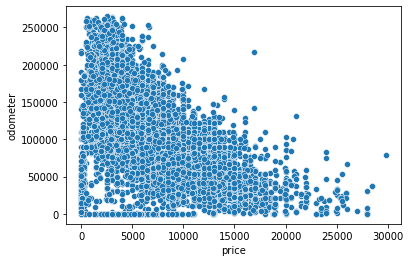

In [524]:
sns.scatterplot(data=df3_sedan, x='price', y='odometer')

<AxesSubplot:xlabel='price', ylabel='age_car'>

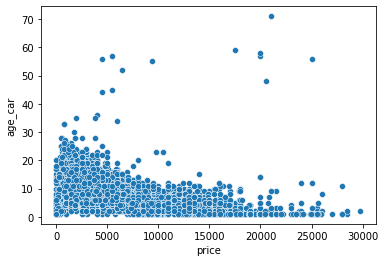

In [525]:
sns.scatterplot(data=df3_sedan, x='price', y='age_car')

The 'new_odometer' and 'age_car' columns show quite absolutely that these two parameters greatly influence the price of a vehicle

In [526]:
df3_sedan['transmission'].value_counts()

automatic    11343
manual         584
other          132
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Correlation of Price and Transmission')

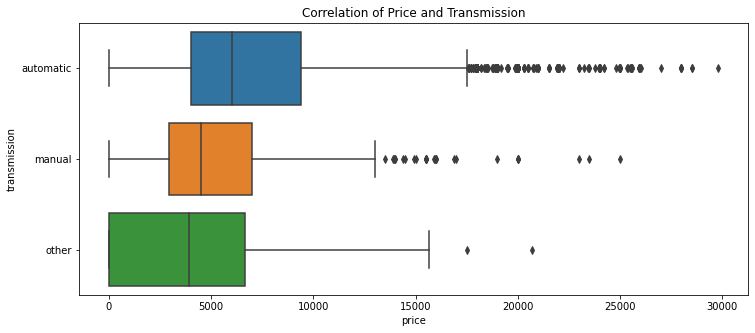

In [527]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df3_sedan, x='price', y='transmission')
plt.title('Correlation of Price and Transmission')

It can be seen in the boxplot of the correlation between 'transmission' and 'price', that automatic transmission is the most advertised. However, all transmissions have almost the same average price, namely under 10,000. It can be underlined that nowadays, people are more interested in automatic transmissions, so transmissions can influence the price of a vehicle in the future

In [528]:
df3_sedan['paint_color'].value_counts()

unknown    2173
silver     2037
black      1759
grey       1611
white      1497
blue       1227
red         941
custom      299
brown       256
green       206
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

In [529]:
list_sedan_colors = list(df3_sedan['paint_color'].value_counts()[:-3].index)

In [530]:
df3_sedan['paint_color'].isnull().sum()

0

In [531]:
df3_sedan_colors = df3_sedan[df3_sedan['paint_color'].isin(list_sedan_colors)].reset_index(drop=True)
df3_sedan_colors

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age_car,odometer_yearly,numeric_condition
0,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333,4
1,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451,3
2,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,20,4,14488,3
3,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,12,27,3,26404,3
4,8990,2012,honda accord,excellent,4,gas,111142,automatic,sedan,grey,False,2019-03-28,29,2019,3,28,7,15877,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2018,10,3,5,17627,4
12002,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2018,11,14,16,11343,0
12003,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2018,11,15,9,14222,3
12004,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2018,7,2,5,27914,2


Text(0.5, 1.0, 'Correlation of Price and Paint Color')

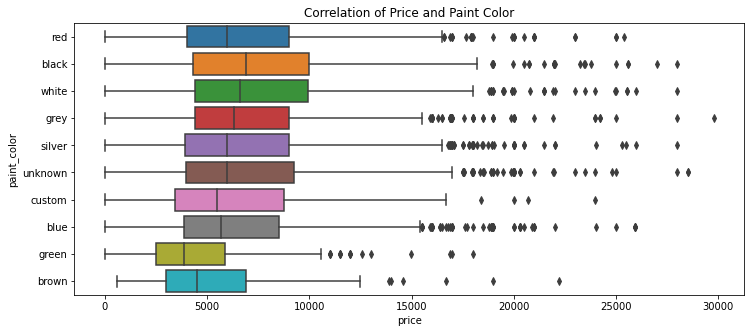

In [532]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df3_sedan_colors, x='price', y='paint_color')
plt.title('Correlation of Price and Paint Color')

For all paint colors on sedans, the average is almost the same, so it doesn't really affect the price of a vehicle, it's just that everyone's tastes are different.

**suv**

In [533]:
df3_suv = df3[df3['type']=='SUV'].reset_index(drop=True)

In [534]:
df3_suv.corr()['price']

price                1.000000
model_year           0.539766
cylinders           -0.030852
odometer            -0.510082
is_4wd               0.109590
days_listed         -0.014738
year_posted         -0.002716
month_posted        -0.003348
day_posted          -0.000659
age_car             -0.540602
odometer_yearly      0.265718
numeric_condition    0.267320
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='odometer'>

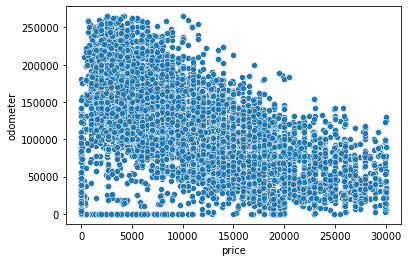

In [535]:
sns.scatterplot(data=df3_suv, x='price', y='odometer')

<AxesSubplot:xlabel='price', ylabel='age_car'>

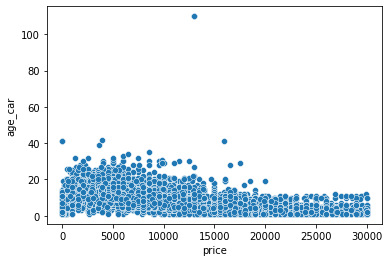

In [536]:
sns.scatterplot(data=df3_suv, x='price', y='age_car')

The 'new_odometer' and 'age_car' columns show quite absolutely that these two parameters greatly influence the price of a vehicle

In [537]:
df3_suv['transmission'].value_counts()

automatic    11179
manual         492
other          158
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Correlation of Price and Transmission')

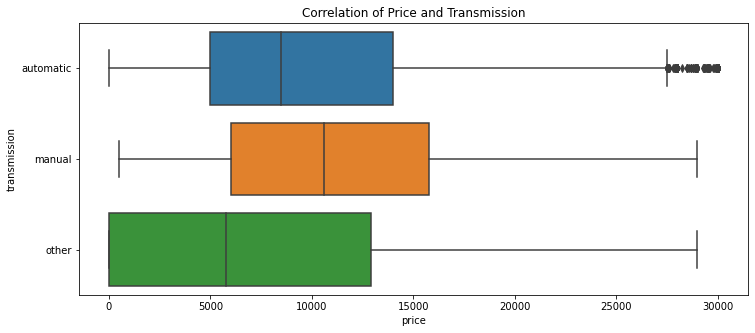

In [538]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df3_suv, x='price', y='transmission')
plt.title('Correlation of Price and Transmission')

It can be seen in the boxplot of the correlation between 'transmission' and 'price', that automatic transmission is the most advertised. But all transmissions have almost the same average price, which ranges between 5000 and 10,000. It can be underlined that nowadays, people are more interested in automatic transmissions, so the transmission can influence the price of a vehicle in the future

In [539]:
df3_suv['paint_color'].value_counts()

unknown    2134
black      2062
white      1843
silver     1515
grey       1137
blue       1021
red         880
green       421
brown       352
custom      297
orange       81
yellow       47
purple       39
Name: paint_color, dtype: int64

In [540]:
list_suv_colors = list(df3_suv['paint_color'].value_counts()[:-2].index)

In [541]:
df3_suv['paint_color'].isnull().sum()

0

In [542]:
df3_suv_colors = df3_suv[df3_suv['paint_color'].isin(list_suv_colors)].reset_index(drop=True)

Text(0.5, 1.0, 'Correlation of Price and Paint Color')

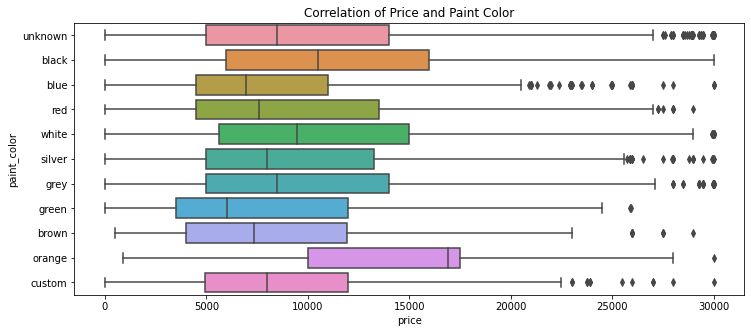

In [543]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df3_suv_colors, x='price', y='paint_color')
plt.title('Correlation of Price and Paint Color')

For 'paint_color' in the SUV type, it is quite interesting, because you can see the difference in the average of each advertised color, it can be seen that black has a fairly high upper limit for outliers. Therefore, it could be said that the 'paint_color' of the type of SUV affects the price of a vehicle

## General Conclusion

The objectives of this analysis include:
1. Select data that will later be used to make conclusions
2. Look at what parameters influence the sales of a vehicle
3. Analyze what factors most influence the price of a vehicle

After analysis, the data answered these objectives with several statements for general conclusions:
1. The initial data used in this analysis is still very dirty, among other things
- missing data that has been handled by creating a new column by filling in the missing values with the median of the column related to the other column references
- outlier data that has been removed by taking certain limits to make it easier for potential buyers
- different data types have been replaced with proper ones
2. In general, there are many parameters that influence the sale of a vehicle, such as price, mileage, age of the vehicle, color of the vehicle, year of manufacture of the vehicle, type of vehicle transmission

3. In particular, there are several factors that greatly influence the sales of a vehicle, such as
- the price definitely has an absolute influence
- the distance traveled by a vehicle can affect the performance of a vehicle's engine
- the year a vehicle was manufactured and the age of the vehicle from its first owner